Fisrt Part of the first Task

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)

    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

In [3]:
def dewatermark(watermarked_img, watermark_img):
    alpha = watermark_img[:, :, 3] / 255.0
    wm_rgb = watermark_img[:, :, :3].astype(np.float32)
    watermarked_rgb = watermarked_img.astype(np.float32)
    alpha_scaled = alpha[:, :, None] * 0.3
    original_est = (watermarked_rgb - alpha_scaled * wm_rgb) / (1 - alpha_scaled)
    original_est = np.clip(original_est, 0, 255).astype(np.uint8)

    return original_est

In [4]:

watermark_img = cv2.imread("/content/iut.png", cv2.IMREAD_UNCHANGED)   # RGBA
watermarked_img = cv2.imread("/content/watermarked.png", cv2.IMREAD_COLOR)  # RGB
original_img = cv2.imread("/content/original.png", cv2.IMREAD_COLOR)   # RGB

In [12]:
Final_img = dewatermark(watermarked_img, watermark_img)

In [13]:
psnr_value = calculate_psnr(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB),
                             cv2.cvtColor(Final_img, cv2.COLOR_BGR2RGB))
print(f"PSNR: {psnr_value:.2f} dB")

PSNR: 55.15 dB


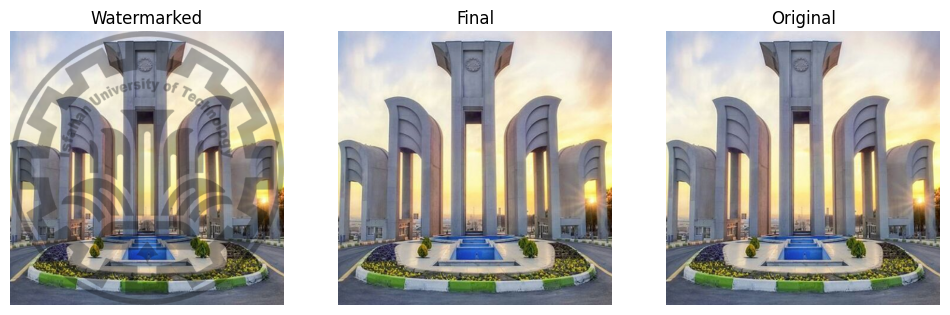

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(watermarked_img, cv2.COLOR_BGR2RGB))
plt.title("Watermarked")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(Final_img, cv2.COLOR_BGR2RGB))
plt.title("Final")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.show()